### Set path to original pyNeuroChem. Please change to your own path

In [1]:
import sys
sys.path.append('/home/olexandr/notebooks/ASE_ANI/lib')
from ase_interface import ANI

In [2]:
import numpy as np
import  ase
#from ase.build import molecule
from ase.neb import NEB
from ase.calculators.mopac import MOPAC
from ase.optimize import BFGS
from ase.neb import NEBtools
from ase.io import read, write
from ase.neb import NEBTools
import matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
# Read the previous configurations
initial = read('data/ethane_dehydro_initial.xyz')
final = read('data/ethane_dehydro_final.xyz')

In [4]:
#  Make 13 images (note the use of copy)
configs = [initial.copy() for i in range(13)] + [final.copy()]

configsM = [initial.copy() for i in range(13)] + [final.copy()]

In [5]:
for config in configs:
    config.set_calculator(ANI())
    
for configM in configsM:
    configM.set_calculator(MOPAC())

In [6]:
# Make the NEB object, interpolate to guess the intermediate steps
neb = NEB(configs, k=5.0)
neb.interpolate()

# Make the NEB object, interpolate to guess the intermediate steps
nebM = NEB(configsM, k=1.0)
nebM.interpolate()

In [7]:
#initial.get_potential_energy()

In [8]:
relax = BFGS(neb, trajectory='neb.traj')
relax.run(fmax=2.0)

      Step     Time          Energy          fmax
BFGS:    0 16:35:34    -2162.582117       10.6162
BFGS:    1 16:35:34    -2163.134331        8.7275
BFGS:    2 16:35:34    -2163.419407        8.9412
BFGS:    3 16:35:34    -2163.514262        6.9192
BFGS:    4 16:35:34    -2163.614150        6.8509
BFGS:    5 16:35:34    -2163.695844        6.2462
BFGS:    6 16:35:34    -2163.757151        5.0401
BFGS:    7 16:35:34    -2163.812262        4.9058
BFGS:    8 16:35:34    -2163.853912        5.3362
BFGS:    9 16:35:34    -2163.873200        4.3968
BFGS:   10 16:35:34    -2163.906151        3.2587
BFGS:   11 16:35:34    -2163.964141        2.5460
BFGS:   12 16:35:34    -2164.081886        3.9180
BFGS:   13 16:35:34    -2164.349013        4.4577
BFGS:   14 16:35:35    -2164.736377        5.9520
BFGS:   15 16:35:35    -2165.177350        7.6092
BFGS:   16 16:35:35    -2165.571018        9.3522
BFGS:   17 16:35:35    -2165.957218        9.0100
BFGS:   18 16:35:35    -2166.355823        7.4122


In [9]:
relaxM = BFGS(nebM, trajectory='nebM.traj')
relaxM.run(fmax=1.0)

      Step     Time          Energy          fmax
BFGS:    0 16:35:38     -319.201160        7.7709
BFGS:    1 16:35:41     -319.759690        7.5817
BFGS:    2 16:35:44     -320.148860        7.4859
BFGS:    3 16:35:47     -320.431990        7.2386
BFGS:    4 16:35:50     -320.689920        6.6847
BFGS:    5 16:35:53     -320.951540        5.9705
BFGS:    6 16:35:56     -321.225330        5.3271
BFGS:    7 16:35:59     -321.529430        4.6073
BFGS:    8 16:36:02     -321.862860        3.8072
BFGS:    9 16:36:05     -322.219960        3.2561
BFGS:   10 16:36:08     -322.562700        2.8628
BFGS:   11 16:36:11     -322.877460        2.4742
BFGS:   12 16:36:14     -323.142460        1.9279
BFGS:   13 16:36:17     -323.347200        1.2303
BFGS:   14 16:36:20     -323.492440        1.0282
BFGS:   15 16:36:23     -323.590730        1.1073
BFGS:   16 16:36:25     -323.678950        1.3088
BFGS:   17 16:36:28     -323.787480        1.3292
BFGS:   18 16:36:31     -323.904240        1.0482


In [10]:
CH1_dist = []
CH2_dist = []
E_rel = []
# Compare intermediate steps to initial energy
initial.set_calculator(ANI())
e0 = initial.get_potential_energy()
for config in configs:
    d1 = config[0].position - config[2].position
    d2 = config[1].position - config[5].position
    CH1_dist.append(np.linalg.norm(d1))
    CH2_dist.append(np.linalg.norm(d2))
    E_rel.append(config.get_potential_energy()- e0)
    #print(np.linalg.norm(d1), config.get_potential_energy() - e0)

In [11]:
CH1_distM = []
CH2_distM = []
E_relM = []
# Compare intermediate steps to initial energy
initial.set_calculator(MOPAC())
e0 = initial.get_potential_energy()
for configM in configsM:
    d1 = configM[0].position - configM[2].position
    d2 = configM[1].position - configM[5].position
    CH1_distM.append(np.linalg.norm(d1))
    CH2_distM.append(np.linalg.norm(d2))
    E_relM.append(configM.get_potential_energy()- e0)

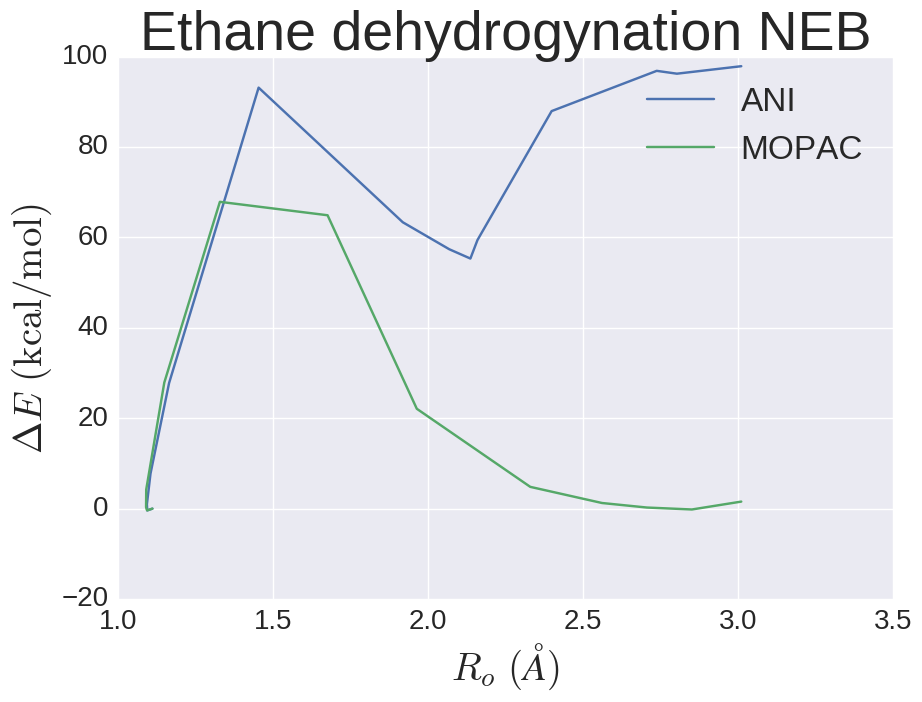

In [12]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
plt.plot(CH1_dist, np.array(E_rel)*23.06, label='ANI')
plt.plot(CH1_distM, np.array(E_relM)*23.06,  label='MOPAC')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'$ R_{o} \ (\AA)$', fontsize=28)
plt.ylabel(r'$ \Delta E\ \mathrm{(kcal/mol)}$', fontsize=28)

plt.title("Ethane dehydrogynation NEB", fontsize=40)
plt.show()